In [380]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os


# Any results you write to the current directory are saved as output.

In [381]:
pwd

'C:\\Users\\Dibyaranjan\\JUPYTER\\PROJECTS\\BMI-Prediction'

In [382]:
df = pd.read_excel('500_Person_Gender_Height_Weight_Index.xlsx')

In [383]:
df.head(5)

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [384]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 849 entries, 0 to 848
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  849 non-null    object
 1   Height  849 non-null    int64 
 2   Weight  849 non-null    int64 
 3   Index   849 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 26.7+ KB


In [385]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Height,849.0,159.571260,19.391387,100.0,145.0,157.0,176.0,199.0
Weight,849.0,76.442874,44.356317,10.0,40.0,67.0,114.0,160.0
Index,849.0,2.573616,1.840852,0.0,1.0,2.0,4.0,5.0


## Missing Values ?

In [386]:
column_list = [var for var in df.columns]

In [387]:
[var for var in df.columns if df[var].isnull().sum() > 0]

[]

There are no missing values

In [388]:
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

In [389]:
# TO set the default figure size
plt.rcParams['figure.figsize'] = [10.0, 6.0]
plt.rcParams['figure.dpi'] = 80

In [390]:
sns.__version__

'0.11.0'

In [391]:
def convert_status_to_description(x):
    if x['Index'] == 0:
        return 'Extremely Weak'
    elif x['Index'] == 1:
        return 'Weak'
    elif x['Index'] == 2:
        return 'Normal'
    elif x['Index'] == 3:
        return 'Overweight'
    elif x['Index']== 4:
        return 'Obesity'
    elif x['Index'] == 5:
        return 'Extreme Obesity'


In [392]:
df['Status'] = df.apply(convert_status_to_description,axis=1)
df.head()

,Gender,Height,Weight,Index,Status
0,Male,174,96,4,Obesity
1,Male,189,87,2,Normal
2,Female,185,110,4,Obesity
3,Female,195,104,3,Overweight
4,Male,149,61,3,Overweight


In [393]:
df_visual = df.copy()

In [394]:
df_visual.head()

,Gender,Height,Weight,Index,Status
0,Male,174,96,4,Obesity
1,Male,189,87,2,Normal
2,Female,185,110,4,Obesity
3,Female,195,104,3,Overweight
4,Male,149,61,3,Overweight


In [395]:
df.drop('Status',axis=1,inplace=True)

In [396]:
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [397]:
df_visual.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [398]:
def convert_gender(X):
    if X=='Male':
        return 1
    else:
        return 0

In [399]:
df_visual['Gender'].apply(convert_gender)

0      1
1      1
2      0
3      0
4      1
      ..
844    1
845    1
846    1
847    1
848    1
Name: Gender, Length: 849, dtype: int64

In [400]:
df_visual['Gender_Converted']=df_visual['Gender'].apply(convert_gender)

In [401]:
df_visual.head()

,Gender,Height,Weight,Index,Status,Gender_Converted
0,Male,174,96,4,Obesity,1
1,Male,189,87,2,Normal,1
2,Female,185,110,4,Obesity,0
3,Female,195,104,3,Overweight,0
4,Male,149,61,3,Overweight,1


In [402]:
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [403]:
df['Gender'] = df.Gender.apply(convert_gender)

In [404]:
df.head(5)

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3


In [405]:
sns.set_style('whitegrid')

C:\Users\Dibyaranjan\anaconda3\envs\Flask\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


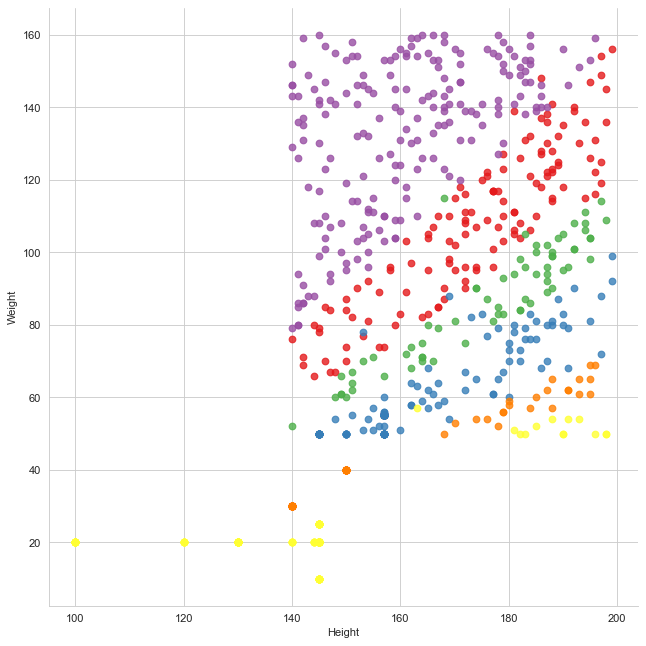

In [406]:
sns.lmplot( x='Height', y='Weight', data=df_visual, 
           fit_reg=False, 
           hue='Status', 
           legend=False, 
           palette='Set1',
           size = 8, 
           aspect = 1
          )

In [407]:
people = df_visual['Gender'].value_counts() 
people.head()

Male      506
Female    343
Name: Gender, dtype: int64

In [408]:
categories = df_visual['Status'].value_counts() 
categories.head()

Extreme Obesity    198
Normal             192
Extremely Weak     174
Obesity            130
Weak                87
Name: Status, dtype: int64

<AxesSubplot:xlabel='Status'>

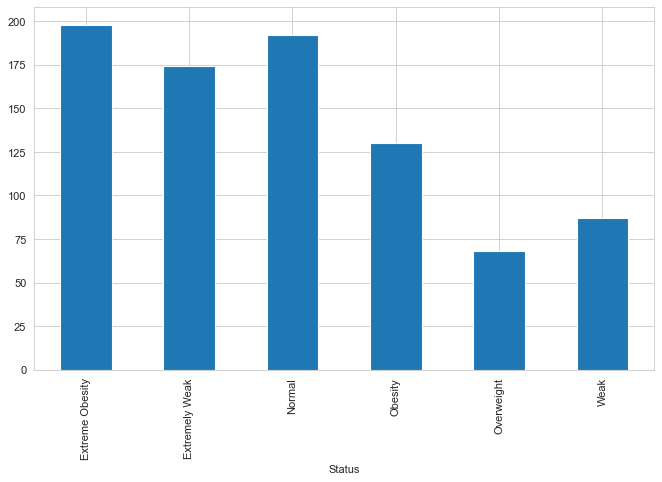

In [409]:
df_visual.groupby('Status')['Gender'].count().plot(kind='bar')

<AxesSubplot:xlabel='Gender', ylabel='Index'>

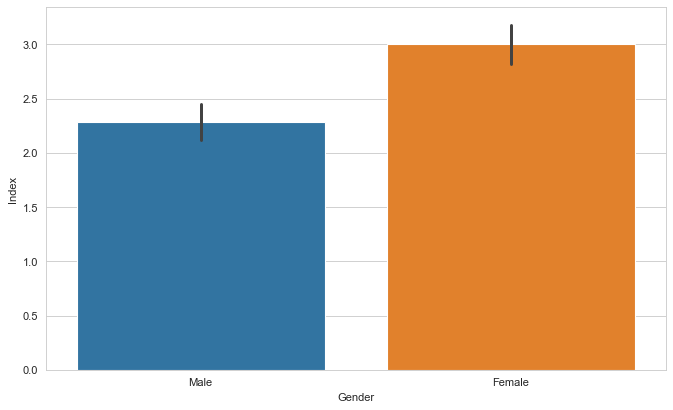

In [410]:
sns.barplot(x='Gender',y='Index',data=df_visual)

<AxesSubplot:xlabel='Height', ylabel='Weight'>

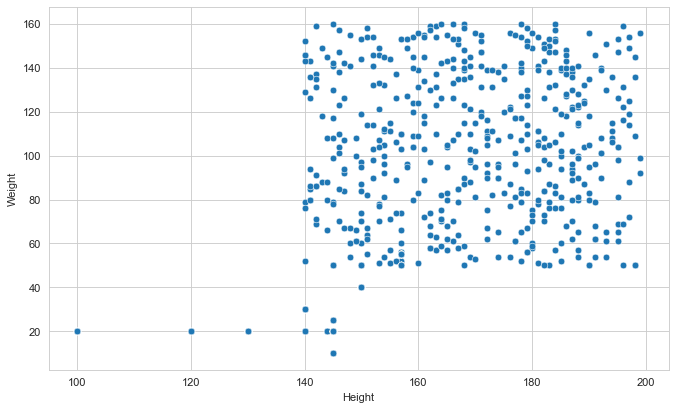

In [411]:
sns.scatterplot(x='Height',y='Weight',data=df_visual)

<AxesSubplot:>

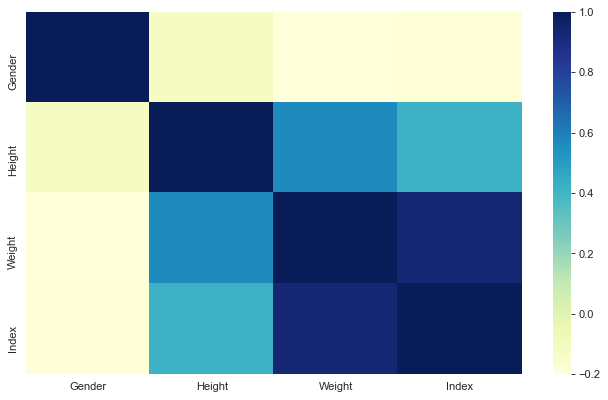

In [412]:
sns.heatmap(df.corr(),cmap='YlGnBu')

In [413]:
data_visual_female = df_visual[df_visual['Gender']=='Female']
data_visual_female.head()

,Gender,Height,Weight,Index,Status,Gender_Converted
2,Female,185,110,4,Obesity,0
3,Female,195,104,3,Overweight,0
9,Female,169,103,4,Obesity,0
11,Female,159,80,4,Obesity,0
12,Female,192,101,3,Overweight,0


In [414]:
data_visual_male = df_visual[df_visual['Gender']=='Male']
data_visual_male.head()

,Gender,Height,Weight,Index,Status,Gender_Converted
0,Male,174,96,4,Obesity,1
1,Male,189,87,2,Normal,1
4,Male,149,61,3,Overweight,1
5,Male,189,104,3,Overweight,1
6,Male,147,92,5,Extreme Obesity,1


In [415]:
data_visual_male_categories = data_visual_male['Status'].value_counts()
data_visual_male_categories

Extremely Weak     135
Normal             124
Extreme Obesity    105
Obesity             59
Weak                51
Overweight          32
Name: Status, dtype: int64

In [416]:
data_visual_female_categories = data_visual_female['Status'].value_counts()
data_visual_female_categories

Extreme Obesity    93
Obesity            71
Normal             68
Extremely Weak     39
Weak               36
Overweight         36
Name: Status, dtype: int64

## Doughnut plot (pie-plot) representing Health Status for Female and Male

Text(0, 0, 'Male')

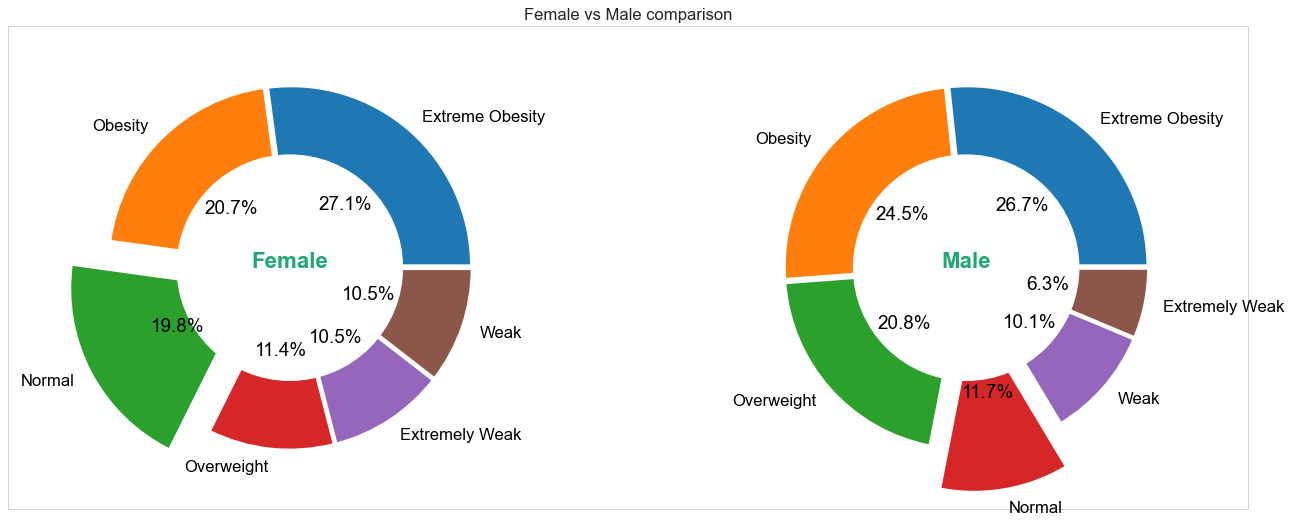

In [417]:
fig = plt.figure(figsize=(20,8))
plt.title("Female vs Male comparison",loc='center',weight=10,size=15)
plt.xticks([]) # to disable xticks
plt.yticks([]) # to disable yticks

# first pie-plot
ax1 = fig.add_subplot(121)
ax1.axis('equal')
explode = (0.01,0.01,0.2,0.01,0.01,0.01)

wedges, texts, autotexts =  ax1.pie(data_visual_female_categories,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['Extreme Obesity','Obesity','Normal','Overweight','Extremely Weak','Weak'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.45,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts,size=17)
plt.setp(texts,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes
ax1.text(0,0,'Female',size=20,color='#1fa774',horizontalalignment='center',weight='bold')

# Second pie-plot
ax2 = fig.add_subplot(122)
ax2.axis('equal')
explode = (0.01,0.01,0.01,0.2,0.01,0.01)
wedges2, texts2, autotexts2 =  ax2.pie(data_visual_male_categories,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['Extreme Obesity','Obesity','Overweight','Normal','Weak','Extremely Weak'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.45,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts2,size=17)
plt.setp(texts2,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes
ax2.text(0,0,'Male',size=20,color='#1fa774',horizontalalignment='center',weight='bold')

# Machine Learning

In [418]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
lbl_enc = LabelEncoder()

In [419]:
from sklearn.preprocessing import StandardScaler

In [420]:
scaler = StandardScaler()

In [421]:
df.head()

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3


In [422]:
df_visual

,Gender,Height,Weight,Index,Status,Gender_Converted
0,Male,174,96,4,Obesity,1
1,Male,189,87,2,Normal,1
2,Female,185,110,4,Obesity,0
3,Female,195,104,3,Overweight,0
4,Male,149,61,3,Overweight,1
...,...,...,...,...,...,...
844,Male,145,20,0,Extremely Weak,1
845,Male,145,20,0,Extremely Weak,1
846,Male,145,20,0,Extremely Weak,1
847,Male,145,20,0,Extremely Weak,1


## Splitting the data into training and testing

In [423]:
df_visual.tail(20)

,Gender,Height,Weight,Index,Status,Gender_Converted
829,Male,145,20,0,Extremely Weak,1
830,Male,145,20,0,Extremely Weak,1
831,Male,145,20,0,Extremely Weak,1
832,Male,145,20,0,Extremely Weak,1
833,Male,145,20,0,Extremely Weak,1
834,Male,145,20,0,Extremely Weak,1
835,Male,145,20,0,Extremely Weak,1
836,Male,145,20,0,Extremely Weak,1
837,Male,145,20,0,Extremely Weak,1
838,Male,145,20,0,Extremely Weak,1


In [424]:
from sklearn.model_selection import train_test_split

In [425]:
X = df.drop('Index',axis=1)

In [426]:
y = df['Index']

In [427]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [428]:
X_train.head()

,Gender,Height,Weight
258,0,169,145
17,1,140,129
533,1,140,30
667,1,157,55
570,1,157,55


In [429]:
y_train.head()

258    5
17     5
533    1
667    2
570    2
Name: Index, dtype: int64

In [430]:
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

## Random Forest calssifier

In [431]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=250, criterion='entropy', random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [432]:
y_pred_rfc = rfc.predict(X_test)

In [433]:
rfc.predict([[1,100,1]])

array([0], dtype=int64)

In [434]:
y_pred_rfc

array([0, 4, 2, 5, 3, 3, 4, 5, 4, 2, 2, 2, 5, 5, 5, 0, 5, 2, 1, 0, 2, 3,
       5, 2, 0, 0, 4, 5, 2, 2, 4, 5, 0, 1, 1, 4, 0, 3, 5, 0, 1, 2, 2, 3,
       1, 4, 1, 1, 2, 3, 2, 1, 2, 5, 2, 1, 0, 2, 2, 0, 5, 2, 0, 5, 5, 5,
       0, 0, 2, 4, 0, 2, 5, 2, 3, 4, 0, 5, 2, 0, 5, 2, 5, 4, 0, 2, 0, 2,
       2, 0, 5, 3, 5, 0, 4, 0, 1, 2, 2, 5, 2, 1, 3, 0, 2, 0, 1, 0, 0, 2,
       2, 5, 2, 3, 4, 2, 1, 5, 4, 2, 4, 5, 0, 0, 2, 5, 4, 0, 2, 1, 2, 2,
       3, 3, 5, 5, 4, 5, 4, 5, 4, 5, 0, 3, 1, 2, 2, 2, 4, 0, 2, 0, 4, 2,
       5, 2, 0, 4, 5, 4, 3, 0, 2, 5, 0, 2, 2, 5, 0, 5, 4, 1, 4, 2, 0, 3,
       1, 5, 0, 2, 4, 5, 3, 3, 0, 0, 4, 2, 5, 5, 0, 0, 4, 1, 2, 0, 5, 4,
       2, 4, 3, 4, 5, 5, 0, 5, 2, 5, 1, 3, 5, 5, 0, 5, 2, 0, 4, 5, 1, 5,
       0, 3, 0, 5, 2, 1, 5, 0, 4, 5, 5, 3, 5, 2, 1, 4, 2, 3, 4, 0, 1, 5,
       0, 5, 5, 0, 0, 2, 4, 4, 1, 5, 2, 2, 1], dtype=int64)

## Mutinomial Gausian Classifier

In [435]:
from sklearn.naive_bayes import GaussianNB 

In [436]:
gnb = GaussianNB()

In [437]:
gnb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [438]:
y_pred_gnb = gnb.predict(X_test_transformed)

### Check Accuracy

In [439]:
from sklearn.metrics import accuracy_score
score_r=accuracy_score(y_test,y_pred_rfc)

In [440]:
print('The Accuraty score for Random Forest classifer is {}'.format(score_r*100) )

The Accuraty score for Random Forest classifer is 90.98039215686275


In [441]:
score_m = accuracy_score(y_test,y_pred_gnb)

In [442]:
print('The Accuracy score for Gaussian classifer is {}'.format(score_m*100) )

The Accuracy score for Gaussian classifer is 20.0


In [443]:
### Create a Pickle file using serialization 
import pickle
pickle_out=open("Classifier.pkl","wb")
pickle.dump(rfc, pickle_out)
pickle_out.close()

In [444]:
df_visual.head()

,Gender,Height,Weight,Index,Status,Gender_Converted
0,Male,174,96,4,Obesity,1
1,Male,189,87,2,Normal,1
2,Female,185,110,4,Obesity,0
3,Female,195,104,3,Overweight,0
4,Male,149,61,3,Overweight,1


In [445]:
df_visual.Index.unique()

array([4, 2, 3, 5, 1, 0], dtype=int64)

In [446]:
df_visual[['Index','Status']].head(30)

,Index,Status
0,4,Obesity
1,2,Normal
2,4,Obesity
3,3,Overweight
4,3,Overweight
5,3,Overweight
6,5,Extreme Obesity
7,5,Extreme Obesity
8,3,Overweight
9,4,Obesity
